# Prediction using Supervised ML

(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
data=pd.read_csv('student_scores .csv')

## Data Overview

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

We see the there are only 25 rows and 2 features.

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


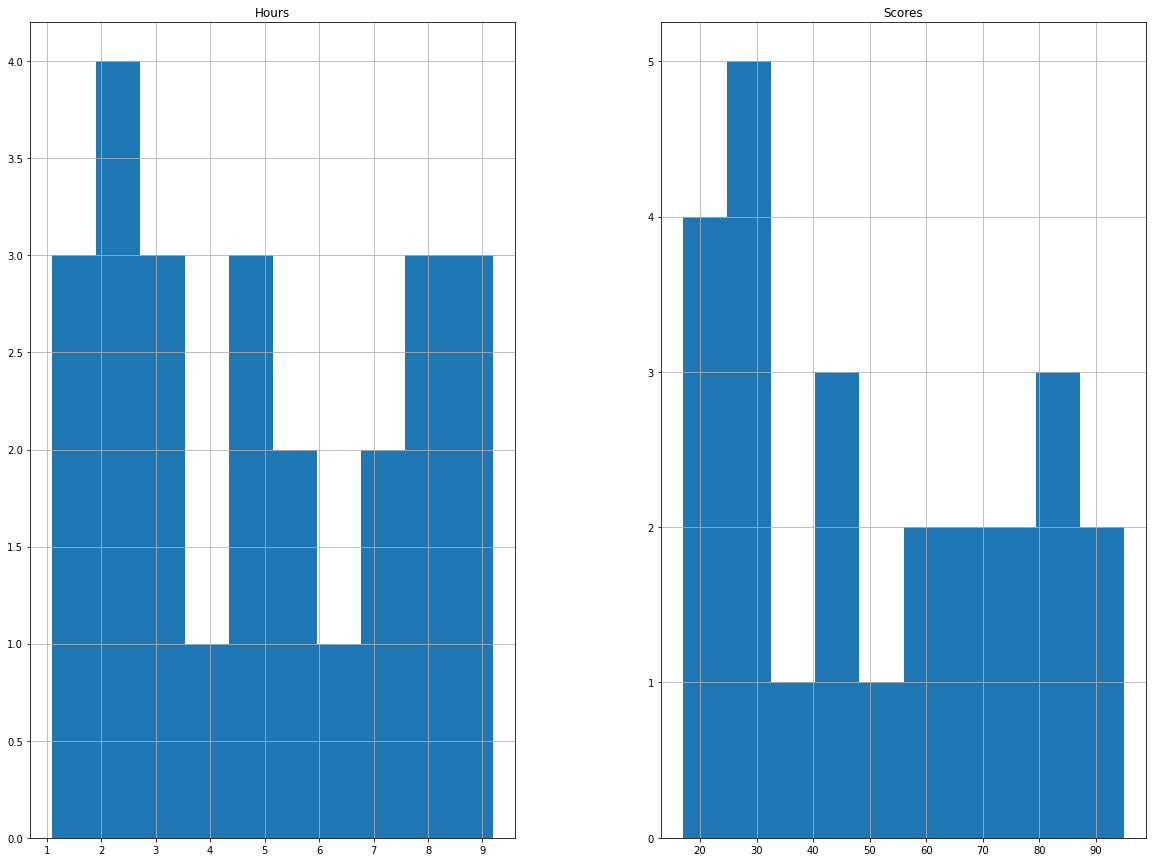

In [7]:
data.hist(figsize=(20,15))
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We see that the data is very highly correlated meaning with the increase in hours of studies the scores increase and vice versa.

## Data Cleaning

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We see no null values in the dataset.

In [10]:
# Spliting Target and Feature.
X=data[['Hours']]
y=data[['Scores']]

In [11]:
X[:5],y[:5]

(   Hours
 0    2.5
 1    5.1
 2    3.2
 3    8.5
 4    3.5,
    Scores
 0      21
 1      47
 2      27
 3      75
 4      30)

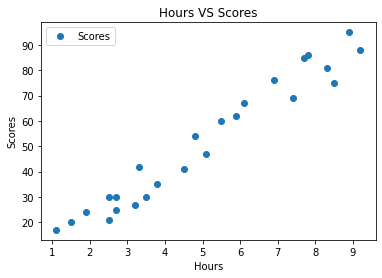

In [12]:
# Data Visualization
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours VS Scores")
plt.ylabel("Scores")
plt.show()

## Training a model

In [13]:
# Since the dataset itself is very small in size. We don't split the data.
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [14]:
lr.predict([[9.25]])

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92.90985477]])

With 9.25 hours study everyday the model predicts the student will obtain 92.9 Score.

In [15]:
# Evaluating Error.
from sklearn.metrics import mean_squared_error
pred=lr.predict(X)
mse=mean_squared_error(y,pred)
rmse=np.sqrt(mse)

In [16]:
print(rmse)

5.374265578592619


The model ain't bad. 

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[9.77580339]]
[2.48367341]


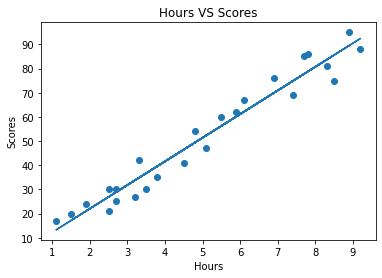

In [18]:
# Let's plot the regression line.
rl=lr.coef_*X+lr.intercept_
plt.scatter(X,y)
plt.plot(X,rl)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()